In [1]:
#importing libraries
import pandas as pd
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#imputing missing values
from sklearn.impute import KNNImputer

In [2]:
#EDA Outline
#1. EDA(Exploratory Data Analysis)
###Make sure there are no missing values(cleaning data)
###Understand relationships between variables
###1. Understand variables
###2. Clean data from redendencies
###3. Analysis of relationship between variables

In [3]:
#import dataset
# 1. Understand variables
df = pd.read_csv('stroke_data.csv', na_values = '?')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
#checking shape of dataset
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#checking variables
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
#checking levels of categorical variables
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
df['hypertension'].unique()

array([0, 1])

In [11]:
df['heart_disease'].unique()

array([1, 0])

In [12]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [14]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [15]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
df['stroke'].unique()

array([1, 0])

In [17]:
# 2. checking missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
#how should we handle missing data?
#articles to see/
#1. https://arxiv.org/pdf/1604.07202.pdf -imputation measure
#2. https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/ -knn imputation

In [19]:
#First we must map categorical variables to numerical variables

#df['gender_map'] = df.gender.map({'Male':0, 'Female':1, 'Other':2})
#df['evermarried_map'] = df.ever_married.map({'Yes':1, 'No':0})
#df['worktype_map'] = df.work_type.map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})
#df['Residencetype_map'] = df.Residence_type.map({'Urban':0, 'Rural':1})
#df['smokingstatus_map'] = df.smoking_status.map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [20]:

imputer = KNNImputer(n_neighbors = 2)
df_filled = imputer.fit_transform(df[['bmi']])

In [21]:
df['bmi'] = df_filled

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
#check if KNN imputation was successful
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [44]:
df.to_csv('clean_stroke_data.csv' , index = False)

In [25]:
#3. Variable relationship analysis
correlation = df.corr()

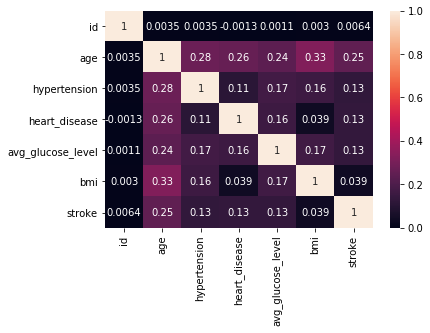

In [26]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)

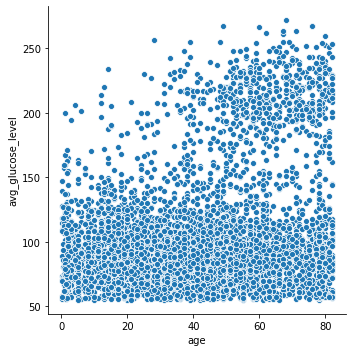

In [27]:
#relationship between age and average glucose level
sns.relplot(x = 'age', y = 'avg_glucose_level', data = df)

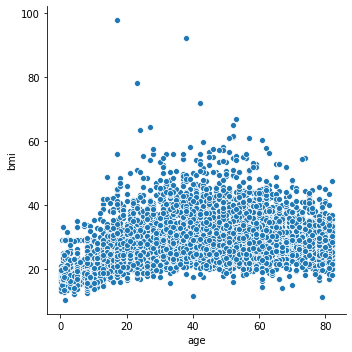

In [28]:
#relationship between age and bmi level
sns.relplot(x = 'age', y = 'bmi', data = df)

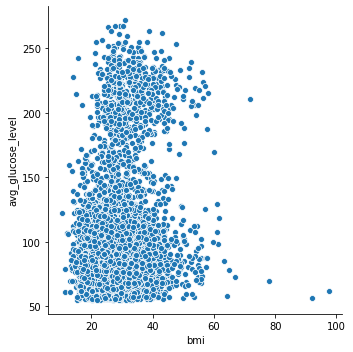

In [29]:
#relationship between bmi and average glucose level
sns.relplot(x = 'bmi', y = 'avg_glucose_level', data = df)

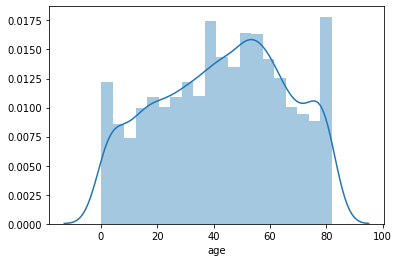

In [30]:
#check distributions of continuous variables(age, bmi, avg_glucose_level)
sns.distplot(df['age'], bins = 20)

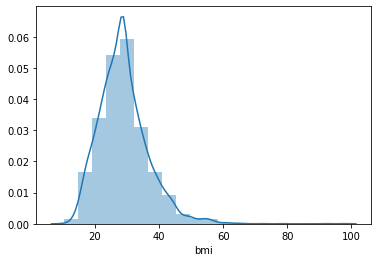

In [31]:
sns.distplot(df['bmi'], bins = 20)

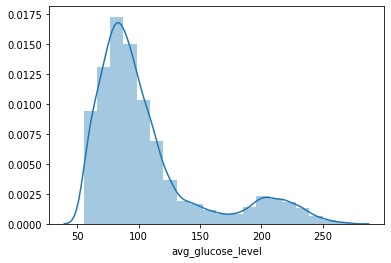

In [32]:
sns.distplot(df['avg_glucose_level'], bins = 20)

In [33]:
#check balances of categorical variables(gender, hypertension, heart_disease, ever_married, work_type, Residence_type
#'smoking_status', 'stroke')

In [34]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

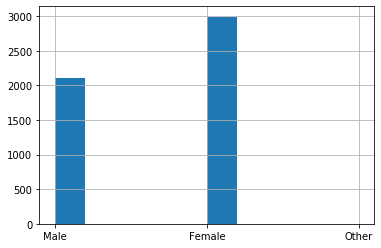

In [35]:
df['gender'].hist()

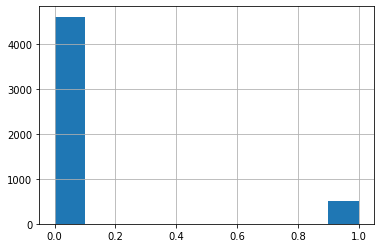

In [36]:
df['hypertension'].hist()

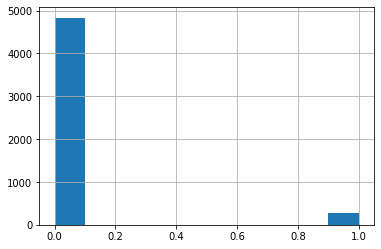

In [37]:
df['heart_disease'].hist()

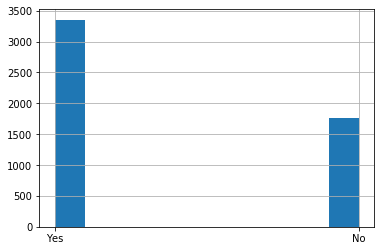

In [38]:
df['ever_married'].hist()

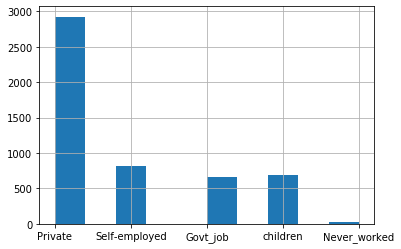

In [39]:
df['work_type'].hist()

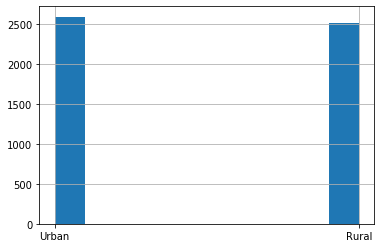

In [40]:
df['Residence_type'].hist()

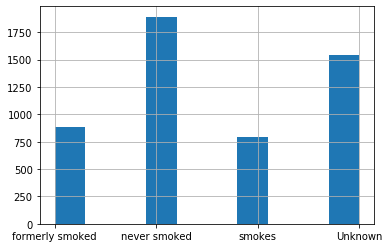

In [41]:
df['smoking_status'].hist()

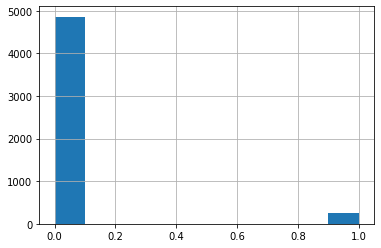

In [42]:
df['stroke'].hist()

In [43]:
#sweetviz library for quick EDA is available
import sweetviz as sv

analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.htm')

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.htm was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
